In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine,fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             mean_squared_error, r2_score)
from sklearn.preprocessing import StandardScaler

## Modelos - Clasificación y Regresión

| Algoritmo         | Clasificación | Regresión |
|-------------------|---------------|-----------|
| Arbol de Decisión |	DecisionTreeClassifier | DecisionTreeRegressor|
| Random Forest     |RandomForestClassifier | RandomForestRegressor|
| Red Neuronal      |	MLPClassifier | MLPRegressor|
| Gradient Boosting |GradientBoostingClassifier | GradientBoostingRegresso|

# Clasificación 

In [5]:
# Cargar Wine dataset desde scikit-learn
# 13 características químicas de tres variedades de vino
# Documentación oficial: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
wine = load_wine(as_frame=True)
df = wine.frame.copy()
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
# Variables predictoras (X) y objetivo (y)
X = df.drop(columns=['target'])
y = df['target']  # 0,1,2 representan variedades de vino distintas
class_names = wine.target_names
feature_names = X.columns

# Dividir datos en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## DecisionTreeClassifier:

<img src="https://miro.medium.com/v2/resize:fit:2000/1*S10T4ah3_JqdQ-eY6Hau0Q.png" width="600" height="400">

- Árbol que particiona datos según características.
- Hiperparámetros clave:
  * max_depth: Profundidad máxima (evita overfitting).
  * min_samples_split: Mínimo de muestras para dividir un nodo.
  * min_samples_leaf: Mínimo de muestras en cada hoja.
  * criterion: 'gini' o 'entropy'. Mide impureza del nodo. Gini = 1 - Σ(p_i^2). Cuanto más bajo el valor de Gini, mayor pureza de los nodos tras el split.

- Poda pre-poda vía max_depth para no dejar hojas con un solo registro.

Documentación:
https://scikit-learn.org/stable/modules/tree.html#classification

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")

Decision Tree Accuracy: 0.963


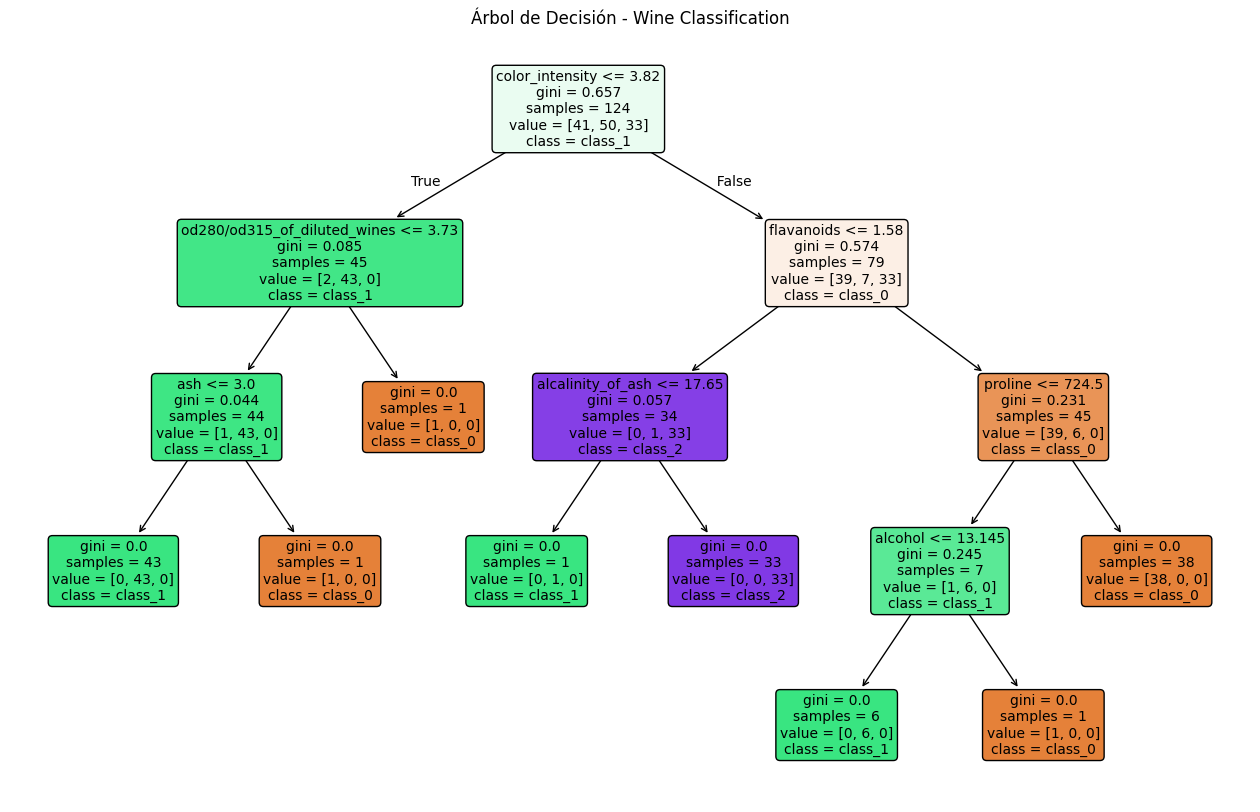

In [9]:
# Visualización del árbol entrenado
plt.figure(figsize=(16,10))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Wine Classification")
plt.show()

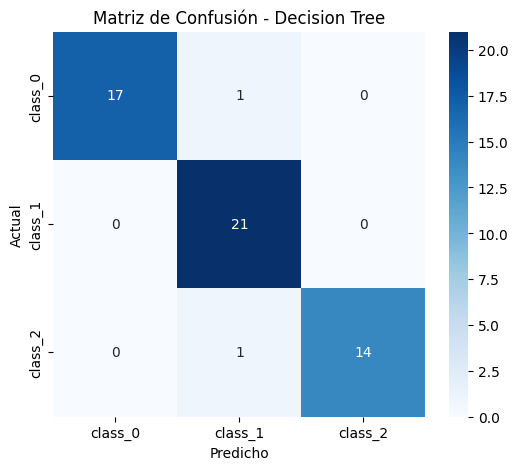

              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [10]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_dt, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Matriz de Confusión - Decision Tree")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_dt, target_names=class_names))

## RandomForestClassifier:

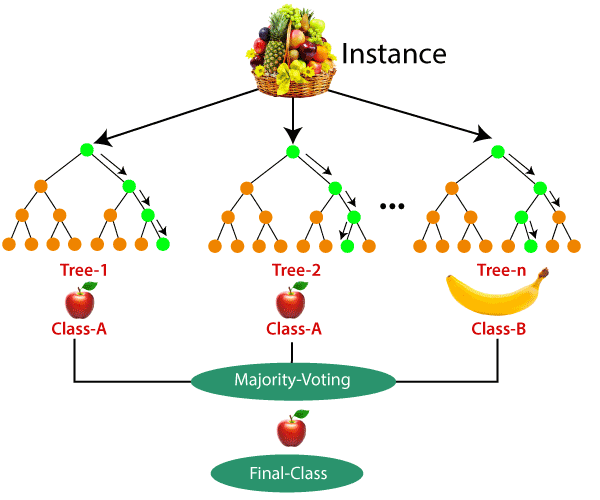

- Ensamble de árboles.
- Hiperparámetros clave:
  * n_estimators: Número de árboles.
  * max_features: Características en cada split.
  * max_depth: Profundidad de los árboles.

Documentación:
https://scikit-learn.org/stable/modules/ensemble.html#forest

In [11]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [12]:
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Random Forest Accuracy: 1.000


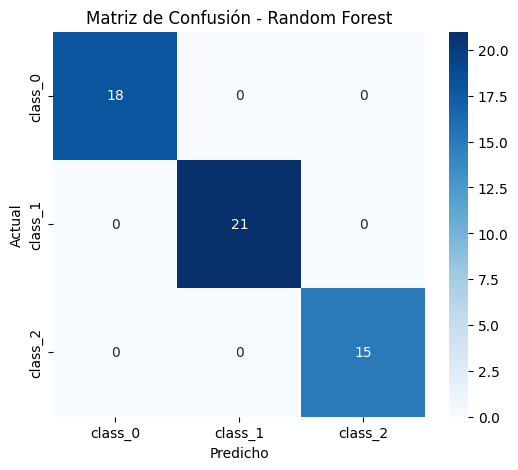

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [13]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_rf, target_names=class_names))

GradientBoostingClassifier:

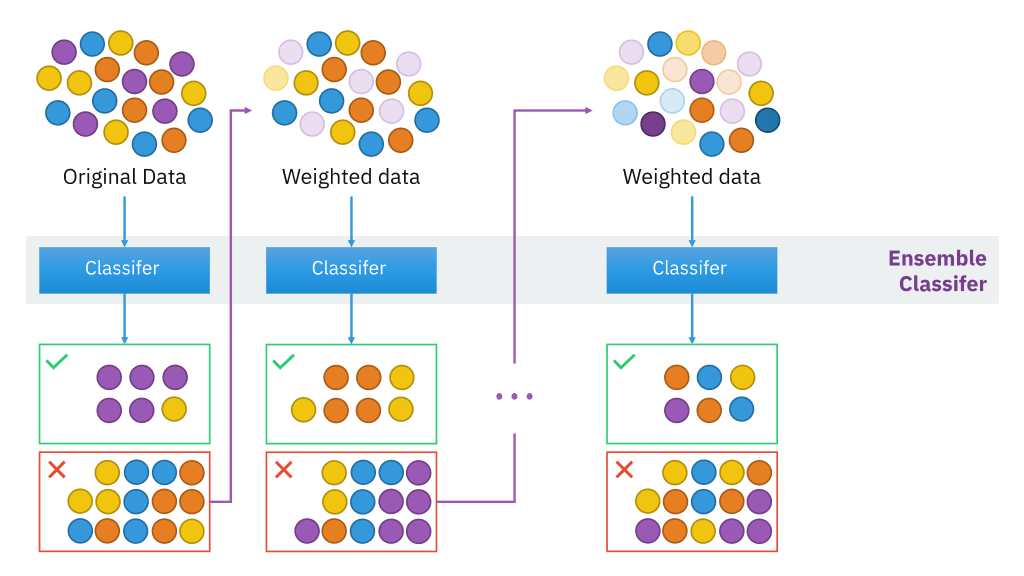

- Ensamble secuencial que corrige errores iterativamente.
- Hiperparámetros:
  * learning_rate: peso de cada nuevo árbol.
  * n_estimators: número de etapas.
  * max_depth: profundidad de árboles base.
- Preciso pero sensible a overfitting.

Documentación:
https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting

In [14]:
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=150,
                           random_state=42)

In [15]:
y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}")

Gradient Boosting Accuracy: 0.907


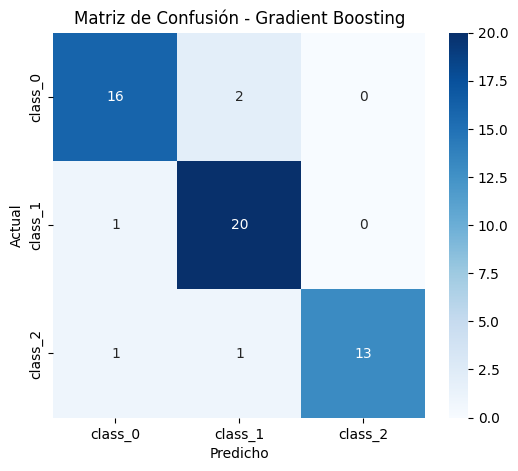

              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.87      0.95      0.91        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.91        54
weighted avg       0.91      0.91      0.91        54



In [16]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_gb, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Matriz de Confusión - Gradient Boosting")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_gb, target_names=class_names))

## Rede Neuronales ANN 

#### Inspiración Biológica
Las redes neuronales están inspiradas en el cerebro humano, donde las neuronas reciben señales, las procesan y las transmiten a otras neuronas. Las redes artificiales imitan este funcionamiento mediante nodos (neuronas) y conexiones (pesos).

#### Arquitectura de un Perceptrón Multicapa (MLP)

 - Capa de Entrada: Recibe las características del dato.

 - Capas Ocultas: 
    - Una o varias capas con n neuronas cada una.
    - Cada neurona calcula una combinación lineal de sus entradas y aplica una función de activación.

 - Capa de Salida
    - Para clasificación: neuronas igual al número de clases, con softmax.
    - Para regresión: una neurona (o más), con activación lineal.

    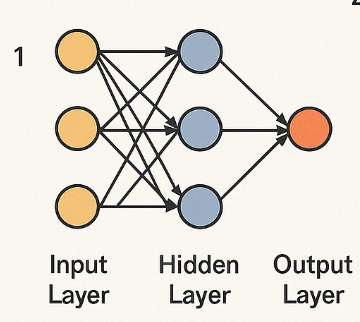

    Link de referencia de mas arquitecturas explicadas https://www.asimovinstitute.org/neural-network-zoo/

 - Aruitecturas especializadas muy usadas:
   - CNN   red neuronal convolucional
   - RNN  red neuronal recurrente
   - LSTM Long Short Term Memory

#### Función de Activación:
 - Step
 - Sigmoid
 - Tanh
 - ReLU
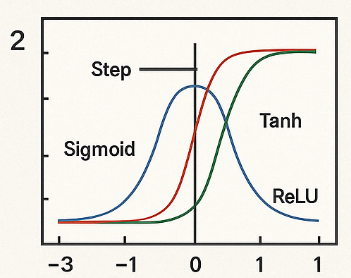

#### Hiperparametros:
 - hidden_layer_sizes: Tupla con neuronas por capa oculta.
 - activation: Función de activación (relu, tanh, logistic).
 - solver: Optimizador (adam, sgd, lbfgs).
 - learning_rate_init: Tasa de aprendizaje inicial.
 - max_iter: Número de iteraciones de entrenamiento.


#### Loss:
(o función de pérdida) en redes neuronales es una métrica que mide qué tan bien o mal el modelo está realizando sus predicciones en comparación con los valores reales. Es una función matemática que cuantifica el error entre las predicciones del modelo y las etiquetas verdaderas.

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
              max_iter=1000)

In [18]:
y_pred_mlp = mlp.predict(X_test)
print(f"MLP Neural Net Accuracy: {accuracy_score(y_test, y_pred_mlp):.3f}")

MLP Neural Net Accuracy: 0.519


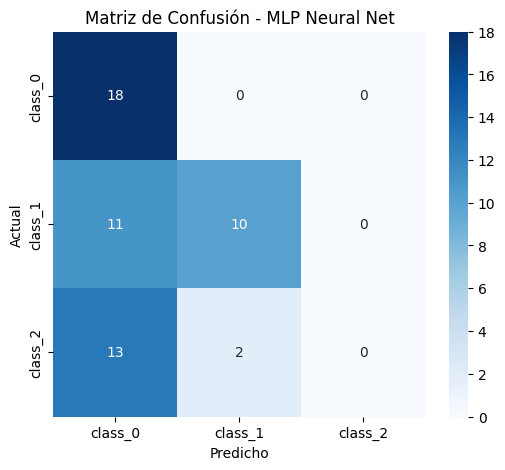

              precision    recall  f1-score   support

     class_0       0.43      1.00      0.60        18
     class_1       0.83      0.48      0.61        21
     class_2       0.00      0.00      0.00        15

    accuracy                           0.52        54
   macro avg       0.42      0.49      0.40        54
weighted avg       0.47      0.52      0.44        54



C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [19]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_mlp, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Matriz de Confusión - MLP Neural Net")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_mlp, target_names=class_names))

## ¿Por qué tiene tan mal precisión? ¿cómo lo podemos mejorar? Se me olvidó algo importante 🤦‍♂️

In [20]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0


Estandarizar las entradas ayuda a que todas las características “hablen el mismo idioma”, garantizando que cada una influya de forma proporcional en los gradientes y que el algoritmo de optimización converja de manera estable y eficiente.

MLP Neural Net Accuracy: 0.981


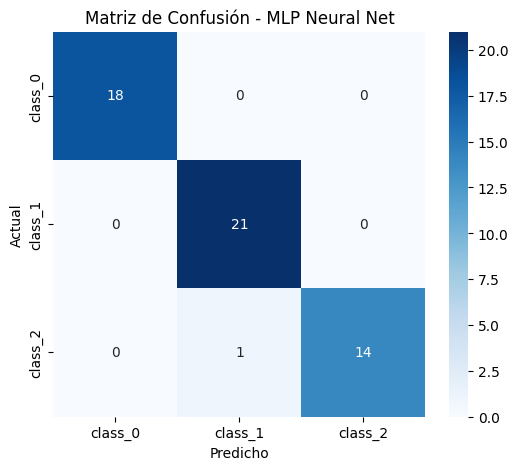

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [21]:
# Escalar datos para MLP
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir MLP con parámetros optimizados
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
# Evaluación de MLP
y_pred_mlp = mlp.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Neural Net Accuracy: {acc_mlp:.3f}")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Matriz de Confusión - MLP Neural Net")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_mlp, target_names=class_names))

# Regresiones

In [22]:
# Cargar California Housing dataset
# 8 características de bloques de vivienda y target = mediana de precios
# Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']
feature_names = X.columns

# Dividir en train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Escalar características
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Decision Tree Regressor

- Árbol que particiona el espacio de características para predecir valores continuos.
- Hiperparámetros:
  * max_depth: Profundidad máxima del árbol.
  * min_samples_split: Muestras mínimas para dividir.
  * min_samples_leaf: Muestras mínimas en hojas.
- Pre-poda con max_depth para evitar overfitting.

- El valor que se predice es el valor promedio de todos los registros en la hoja o nodo resultante. 

Documentación:
https://scikit-learn.org/stable/modules/tree.html#regression

In [24]:
dt_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [25]:
y_pred_dt = dt_reg.predict(X_test)
MSE_DT = mean_squared_error(y_test, y_pred_dt)
R2_DT = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.3f}")
print(f"Decision Tree R2: {r2_score(y_test, y_pred_dt):.3f}")

Decision Tree MSE: 0.478
Decision Tree R2: 0.636


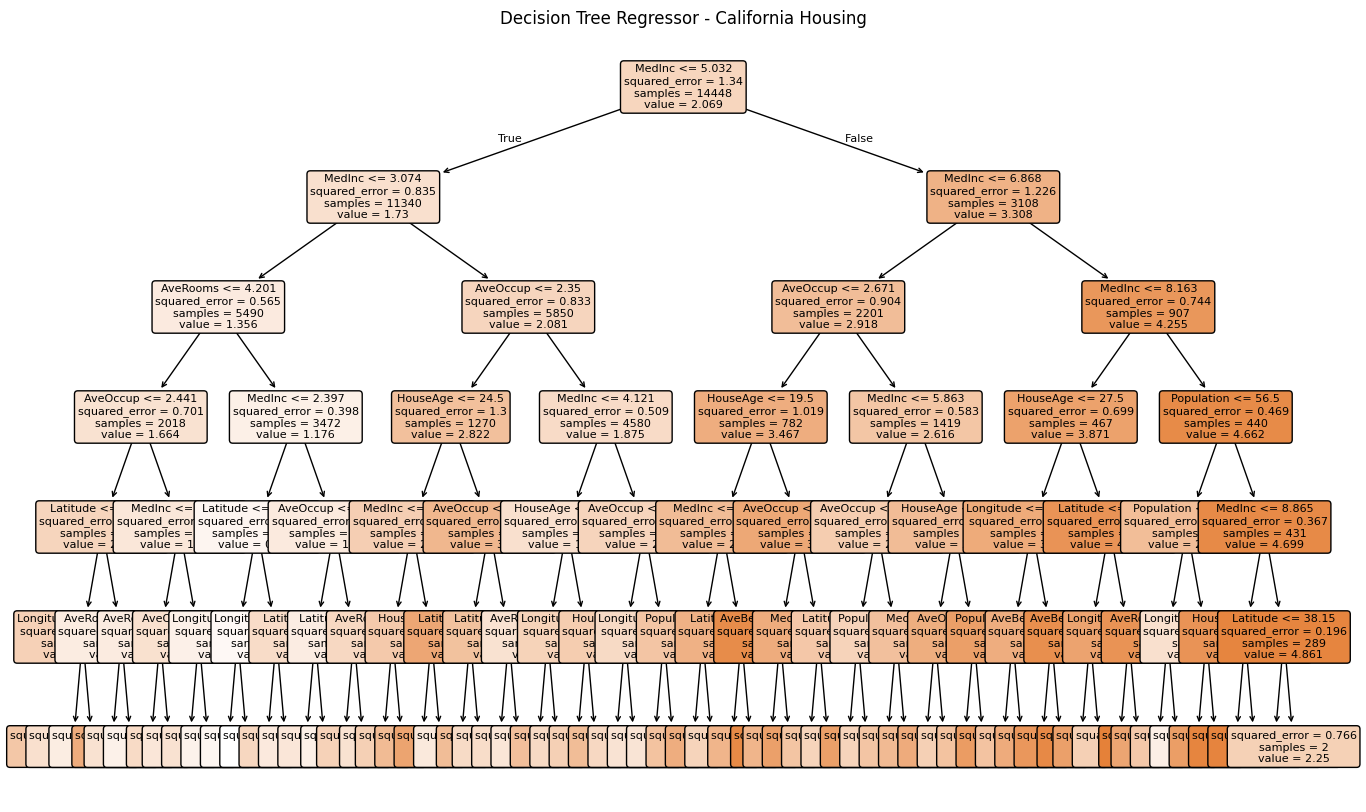

In [26]:
a = plt.figure(figsize=(16,10))
plot_tree(
    dt_reg,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Regressor - California Housing")
plt.show()

### Random Forest Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [27]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=42)

In [28]:
y_pred_rf = rf_reg.predict(X_test)
MSE_RF = mean_squared_error(y_test, y_pred_rf)
R2_RF = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.3f}")

Random Forest MSE: 0.337
Random Forest R2: 0.744


### GradientBoostingRegressor

In [29]:
gb_reg = GradientBoostingRegressor(
    n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42
)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=150,
                          random_state=42)

In [30]:
y_pred_gb = gb_reg.predict(X_test)
MSE_GB = mean_squared_error(y_test, y_pred_gb)
R2_GB = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.3f}")
print(f"Gradient Boosting R2: {r2_score(y_test, y_pred_gb):.3f}")

Gradient Boosting MSE: 0.268
Gradient Boosting R2: 0.796


### MLP Regressor

MLPRegressor:
- Red neuronal para regresión continua.
- Hiperparámetros:
  * hidden_layer_sizes: neuronas en capas ocultas.
  * activation: función de activación.
  * solver: optimizador.
  * learning_rate_init: tasa de aprendizaje.
  * alpha: regularización L2.
  * early_stopping: detiene si no hay mejora.

Documentación:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [31]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(100,50), activation='relu', solver='adam',
    learning_rate_init=0.01, alpha=0.001, max_iter=2000,
    early_stopping=True, verbose=True
)
mlp_reg.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.46952186
Validation score: 0.730385
Iteration 2, loss = 0.20517820
Validation score: 0.743846
Iteration 3, loss = 0.19182714
Validation score: 0.759037
Iteration 4, loss = 0.17846224
Validation score: 0.740541
Iteration 5, loss = 0.18267811
Validation score: 0.757446
Iteration 6, loss = 0.16853299
Validation score: 0.733383
Iteration 7, loss = 0.18093552
Validation score: 0.773244
Iteration 8, loss = 0.16855857
Validation score: 0.774714
Iteration 9, loss = 0.15771259
Validation score: 0.574252
Iteration 10, loss = 0.18778627
Validation score: 0.758860
Iteration 11, loss = 0.15853859
Validation score: 0.775578
Iteration 12, loss = 0.15583251
Validation score: 0.768572
Iteration 13, loss = 0.15175601
Validation score: 0.780134
Iteration 14, loss = 0.15796347
Validation score: 0.788354
Iteration 15, loss = 0.15763212
Validation score: 0.773753
Iteration 16, loss = 0.18068106
Validation score: 0.739793
Iteration 17, loss = 0.17180410
Validation score: 0.779605
Iterat

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50),
             learning_rate_init=0.01, max_iter=2000, verbose=True)

In [32]:
y_pred_mlp = mlp_reg.predict(X_test_scaled)
MSE_MLP = mean_squared_error(y_test, y_pred_mlp)
R2_MLP = r2_score(y_test, y_pred_mlp)
print(f"MLP Regressor MSE: {mean_squared_error(y_test, y_pred_mlp):.3f}")
print(f"MLP Regressor R2: {r2_score(y_test, y_pred_mlp):.3f}")

MLP Regressor MSE: 0.281
MLP Regressor R2: 0.786


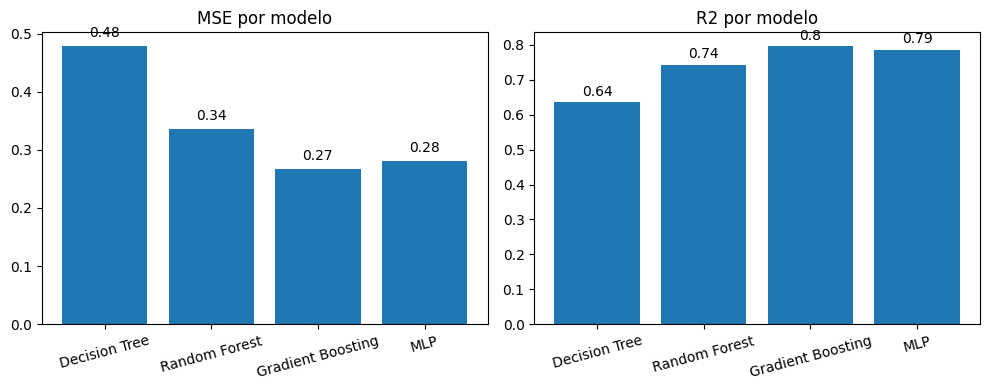

In [33]:
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'MLP']
mse = [MSE_DT,
      MSE_RF,
      MSE_GB,
      MSE_MLP]
r2 = [R2_DT,
      R2_RF,
      R2_GB,
      R2_MLP]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(models, mse)
for i, v in enumerate(mse):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.title('MSE por modelo')
plt.xticks(rotation=15)
plt.subplot(1,2,2)
plt.bar(models, r2)
for i, v in enumerate(r2):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.title('R2 por modelo')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Deep Learning

## Convolutional Neural Networks (CNN)

- **¿Qué son?**  
  Redes diseñadas para datos en cuadrícula (imágenes) que utilizan **convoluciones** para extraer características locales.

- **Capas principales:**  
  1. **Convolucionales:** filtros (kernels) que detectan patrones (bordes, texturas).  
  2. **ReLU:** introduce no linealidad (`f(x)=max(0,x)`).  
  3. **Pooling:** reduce resolución espacial (p. ej. max‑pooling 2×2), aportando invarianza.

- **Ventajas:**  
    - **Compartición de pesos:** mismos filtros en toda la imagen.  
    - **Menos parámetros** que un MLP equivalente.  
    - **Robustez** a traslaciones y distorsiones pequeñas.

- **Uso habitual:**  
Clasificación de imágenes, detección de objetos, segmentación semántica, etc.


In [94]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [95]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
## length od the train 
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

60000 60000
10000 10000


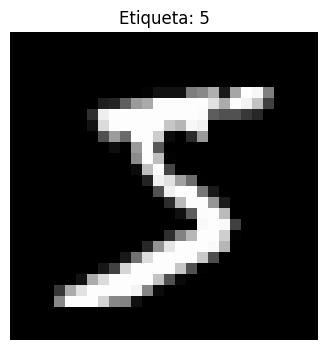

In [96]:
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis('off')
plt.show()

In [97]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Expandir dimensión de canal (batch, alto, ancho, canales)

- -1: Calcula automáticamente el tamaño del primer eje (número de muestras).
- 28, 28: Mantiene las dimensiones originales de las imágenes (28x28 píxeles).
- 1: Agrega un canal adicional para representar imágenes en escala de grises (1 canal). Esto es necesario porque las CNNs esperan datos con canales, como imágenes RGB (3 canales) o escala de grises (1 canal).

In [98]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test .reshape(-1, 28, 28, 1).astype('float32') / 255.0



One hot encoder para Y

0 = [1,0,0,0,0,0,0,0,0,0]
1 = [0,1,0,0,0,0,0,0,0,0]
2 = [0,0,1,0,0,0,0,0,0,0]
.
.
.
9 = [0,0,0,0,0,0,0,0,0,1]


In [99]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [100]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

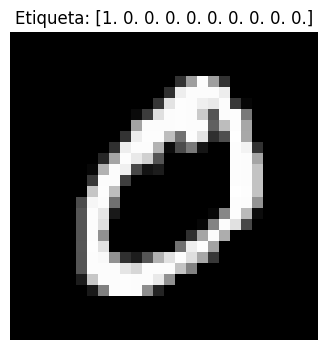

In [101]:
plt.figure(figsize=(4, 4))
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Etiqueta: {y_train[1]}")
plt.axis('off')
plt.show()

## Definir la arquitectura CNN


In [102]:
model = models.Sequential([
    # Capa convolucional: extrae patrones locales
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # Pooling: reduce dimensionalidad
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Aplanar para pasar a capas densas
    layers.Flatten(),
    # Capa oculta totalmente conectada
    layers.Dense(64, activation='relu'),
    # Capa de salida con softmax para 10 clases
    layers.Dense(10, activation='softmax')
])

C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilar el modelo

In [103]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Entrenando el modelo

 - Epoch: cuantas pasadas completas por el conjunto completo
 - Batch size: número de muestras procesadas antes de actualizar el modelo
 - validation_split: porcentaje de datos para validación

In [104]:
history = model.fit(
    x_train, y_train,
    epochs=10,              # número de pasadas sobre el dataset
    batch_size=128,         # tamaño de lote
    validation_split=0.1,   # 10% de validación
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8277 - loss: 0.5881 - val_accuracy: 0.9802 - val_loss: 0.0713
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9774 - loss: 0.0735 - val_accuracy: 0.9818 - val_loss: 0.0562
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9862 - val_loss: 0.0473
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9922 - loss: 0.0261 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9895 - val_loss: 0.0340
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9958 - loss: 0.0138 - val_accu

## Validar el modelo

In [105]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0366
Test accuracy: 0.990


## Prueba propia
escribe tu propio numero y mira si lo clasifica bien
https://sketch.io/sketchpad/

recuerda hacerlo en 28x28 pixeles

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


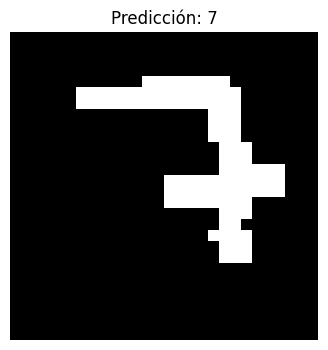

In [111]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = "7test.png"  # Cambia esto por la ruta de tu imagen
img = Image.open(image_path).convert('L')  # Convertir a escala de grises

# Preprocesar la imagen
img_resized = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
img_array = np.array(img_resized).astype('float32') / 255.0  # Normalizar entre 0 y 1
img_array = img_array.reshape(1, 28, 28, 1)  # Expandir dimensiones

# Realizar la predicción
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Mostrar la imagen y la predicción
plt.figure(figsize=(4, 4))
plt.imshow(img_resized, cmap='gray')
plt.title(f"Predicción: {predicted_class}")
plt.axis('off')
plt.show()

## Ejercicio:

from sklearn.datasets import load_breast_cancer

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset


In [112]:
from sklearn.datasets import load_breast_cancer